In [9]:
matplotlib inline

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import sklearn.linear_model

In [6]:
df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


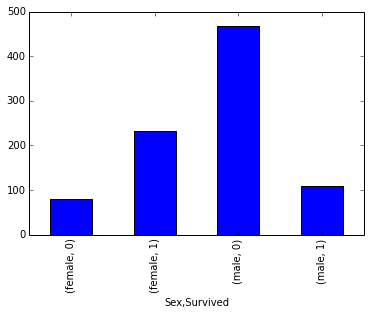

In [10]:
df.groupby(["Sex", "Survived"]).count()["PassengerId"].plot(kind="bar")

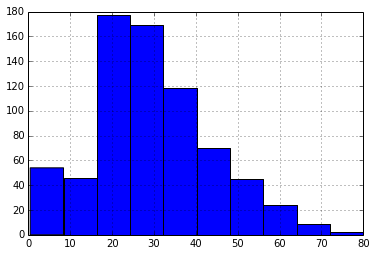

In [11]:
df["Age"].hist()

In [13]:
clf = sklearn.linear_model.LogisticRegression()
DV = "Survived"
IVs = ["Age"]
subdata = df[[DV]+IVs].dropna()

In [14]:
subdata.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [15]:
X = subdata[IVs]
Y = subdata[DV].values
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
predictions = clf.predict(X)

In [17]:
correct = [int(real == predicted) for real, predicted in zip(Y, predictions)]

In [18]:
np.mean(correct)

0.5938375350140056